<a href="https://colab.research.google.com/github/agus2207/ESCOM/blob/master/Analisis_de_imagenes/P2_AGR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT1w0hKLRBfUWki17i13oJcYhpwHa2tEon1oZagn7lYdogzehai&usqp=CAU" width="100" height="100" align="left" alt="IPN"/>
<img src="https://img1.freepng.es/20180531/hyf/kisspng-escom-instituto-politcnico-nacional-escuela-supe-lemon-grass-5b0fbe5636a625.6618946915277584222239.jpg" width="100" height="100" align="right" alt="Escom"/>
<h1><center><b>Análisis de Imagenes</b></center></h1>
<h1><center><b>Practica 2: Filtrado Espacial. Los filtros paso bajas</b></center></h1>

---

- **`Nombre:`** Galindo Reyes Agustin
- **`Grupo`**: 3CV6.
- **`Materia`**: Análisis de Imágenes.
- **`Profesor`**: Maria Elena Cruz Meza.
- **`Fecha de entrega`**: 01 de Mayo del 2020.
- **`Objetivo`**: Comprender el funcionamiento y operación de las técnicas de filtros basados en su linealidad: Los Filtros Paso Bajas:
  1. Conocer los conceptos básicos del filtrado espacial con la finalidad de poder diferenciarlos los métodos de realce en el dominio espacial de los métodos
de realce en el dominio de la frecuencia.
  2. Manipular los Filtros Paso-Bajas con el fin de poder utilizarlos en la reducción de ruido; comprender que al suavizar estos aplanan un poco las imágenes y como
consecuencia se reduce o se pierde la nitidez en la imagen (Smoothing Spatial Filters).
  3. Analizar la conveniencia de aplicar un realce de la imagen aplicando filtros paso bajas, preparándola para su posterior tratamiento.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Image_analisis/Practica2_ME/Imagenes

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Image_analisis/Practica2_ME/Imagenes


# **Filtrado Espacial**

El concepto de filtrado de una imagen esta asociado a la representación de una imagen en el dominio de frecuencias. Cualquier filtro que se diseñe tendrá como objetivo modificar la contribución de determinados rangos de frecuencias a la formación de la imagen. Así por ejemplo si queremos filtrar una imagen de una posible contaminación de ruido aleatorio lo que tendremos que hacer es diseñar un filtro que reduzca lo más posible la contribución de las altas frecuencias en la formación de la imagen. Si em cambio lo que queremos es realzar cualquier patrón de comportamiento presente en la imagen y sabemos que dicho patrón está asociado a un determinado rango de frecuencias en la formación de la imagen, lo que haremos será construir un filtro que disminuya la contribución de cualquier frecuencia que no este dentro del rango deseado. 

Se trata de métodos para resaltar o suprimir, de forma selectiva, información contenida en una imagena diferentes escalas espaciales, para destacar algunos elementos de la imagen, o también para ocultar valores anómalos. Otra técnica para aislar información correspondiente a diferentes escalas espaciales es la transformada de Fourier.

El proceso de filtrado consiste en la aplicación a cada uno de los pixels de la imagen de una matriz defiltrado de tamaño NxN(generalmente de 3x3 aunque puede ser mayor) compuesta por números enterosy que genera un nuevo valor mediante una función del valor original y los de los pixels circundantes. Elresultado final se divide entre un escalar, generalmente la suma de los coeficientes de ponderación.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


### **Algunas funciones de apoyo para cargar imagenes**

In [ ]:
#Displays an array as an image
def im_show(pic,ip):
    height=pic.shape[0]
    width=pic.shape[1]
    
    print(type(pic))
    channels=1
    if pic.ndim>2:
        channels=3
    #ip="nearest"
    plt.figure(figsize=(10,int(10*float(height)/float(width)) ))
    if channels==1:
        plt.imshow(pic,cmap='gray',interpolation=ip,aspect="auto")
    else:
        plt.imshow(pic,interpolation=ip,aspect="auto")

def im_load(file):
    pic=Image.open(file) #Open the image
    print("Image type:"+str(type(pic))) #Displays the type of image (JPEG, BMP, PNG, GIF, etc)
    pic_arr = np.asarray(pic) #converts the image to an Numpy Array
    print("Dimentions"+str(pic_arr.shape)) #(height,width,#of channels)
    pic_channels=1
    if pic_arr.ndim>2:
        pic_channels=3
    print("Channels:"+str(pic_channels))
    #im_show(pic_arr)
    return pic_arr

def noise(img, salt, pepper):
    height=img.shape[0]
    width=img.shape[1]  
    img_r=np.asarray(img.copy(),order="C")
    
    hw=height*width
    
    if salt>0 and salt<=1:
        npixels=int(float(hw)*salt)
        for i in range(npixels):
            x = np.random.randint(0,width,1)
            y = np.random.randint(0,height,1)
            img_r[y[0],x[0]]=255
            
        
    if pepper>0 and pepper<=1:
        npixels=int(float(hw)*pepper)
        for i in range(npixels):
            x = np.random.randint(0,width,1)
            y = np.random.randint(0,height,1)
            img_r[y[0],x[0]]=0
    
    return img_r

In [ ]:
arr_pic1 = np.array([[5,14,0,0,56,35,42],[0,180,180,179,79,55,47],[1,188,0,191,50,50,10],[193,33,215,255,160,10,0],[200,230,0,230,190,200,200],[0,230,200,230,190,0,200],[0,2,2,18,12,70,0]])
arr_pic1

array([[  5,  14,   0,   0,  56,  35,  42],
       [  0, 180, 180, 179,  79,  55,  47],
       [  1, 188,   0, 191,  50,  50,  10],
       [193,  33, 215, 255, 160,  10,   0],
       [200, 230,   0, 230, 190, 200, 200],
       [  0, 230, 200, 230, 190,   0, 200],
       [  0,   2,   2,  18,  12,  70,   0]])

# **Filtros Pasa Bajas**

Su objetivo es suavizar la imagen, son útiles cuando se supone que la imagen tiene gran cantidad de ruido y se quiere eliminar. También pueden utilizarse para resaltar la información correspondiente a una determinada escala (tamaño de la matriz de filtrado); por ejemplo en el caso de que se quiera eliminar la variabilidad asociada a los tipos de cubierta presentes en la imagen uniformizando de esta manera su respuesta.

Estos filtros estan especialmente indicados para suprimir rangos de frecuencias altos. Esto implica que el uso de los mismos tendrá el efecto de un emborronamiento de todas aquellas características asociadas con altas frecuencias ( fronteras, saltos, ruido, etc).

Tienen por objeto suavizar los contrastes espaciales presentes en una imagen. Un filtro espacial de paso bajo tiene por efecto dejar pasar o mantener intocables los componentes de baja frecuencia espacial de una imagen. Los componentes de alta frecuencia están atenuados o virtualmente ausentesen la imagen de salida.

In [ ]:
%%cython -a
import numpy as np
import statistics
cimport cython
@cython.boundscheck(False) 
@cython.wraparound(False)

def cython_valid_pixel(const float pixel):
    if pixel < 0.0:
        pixel = 0.0
    elif pixel > 255.0:
        pixel = 255.0
    return pixel

def cython_kernel_espejo(kernel):
    cdef new_kernel = np.rot90(kernel,2)
    return new_kernel

def filtro_gray(const unsigned char[:,:] img1, kernel, const int inicio_x, const int inicio_y):
    cdef int height = img1.shape[0]
    cdef int width = img1.shape[1]
    cdef int h_kernel = kernel.shape[0]
    cdef int w_kernel = kernel.shape[1]
    cdef int i, j, k_i, k_j, conter_i, conter_j
    cdef double res
    cdef img_r = np.zeros((height, width), dtype=np.uint8)
    cdef img_t = np.zeros((height+h_kernel-1, width+w_kernel-1), dtype=np.int16)
    img_t[inicio_x:height+inicio_x, inicio_y:width+inicio_y] = img1.copy()

    for i in range(height):
        for j in range(width):
            res = 0.0
            conter_i = i
            for k_i in range(h_kernel):
                conter_j = j
                for k_j in range(w_kernel):
                    tem = float(img_t[conter_i, conter_j])*float(kernel[k_i, k_j])
                    res+=tem
                    conter_j+=1
                conter_i+=1
            img_r[i,j] = int(cython_valid_pixel(round(res)))
    return img_r

def mediana_gray(const unsigned char[:,:] img1, kernel, const int inicio_x, const int inicio_y):
    cdef int height = img1.shape[0]
    cdef int width = img1.shape[1]
    cdef int h_kernel = kernel.shape[0]
    cdef int w_kernel = kernel.shape[1]
    cdef int i, j, k_i, k_j, conter_i, conter_j
    cdef double res
    cdef img_r = np.zeros((height, width), dtype=np.uint8)
    cdef img_t = np.zeros((height+h_kernel-1, width+w_kernel-1), dtype=np.int16)
    img_t[inicio_x:height+inicio_x, inicio_y:width+inicio_y] = img1.copy()

    for i in range(height):
        for j in range(width):
            temporal = []
            conter_i = i
            for k_i in range(h_kernel):
                conter_j = j
                for k_j in range(w_kernel):
                    tem = float(img_t[conter_i, conter_j])
                    temporal.append(tem)
                    conter_j+=1
                conter_i+=1
            temporal.sort()
            res_final = statistics.median(temporal)
            img_r[i,j] = int(cython_valid_pixel(round(res_final)))
    return img_r

def filtro_rgb(const unsigned char[:,:,:] img1, kernel, const int inicio_x, const int inicio_y):
    cdef int height = img1.shape[0]
    cdef int width = img1.shape[1]
    cdef int chanels = img1.shape[2]
    cdef int h_kernel = kernel.shape[0]
    cdef int w_kernel = kernel.shape[1]
    cdef int i, j, c, k_i, k_j, conter_i, conter_j
    cdef double res
    cdef img_r = np.zeros((height, width, chanels), dtype=np.uint8)
    cdef img_t = np.zeros((height+h_kernel-1, width+w_kernel-1, chanels), dtype=np.int16)
    img_t[inicio_x:height+inicio_x, inicio_y:width+inicio_y, 0:3] = img1.copy()

    for i in range(0,height):
        for j in range(0,width):
            for c in range(0,chanels):
                res = 0.0
                conter_i = i
                for k_i in range(0,h_kernel):
                    conter_j = j
                    for k_j in range(0,w_kernel):
                        tem = float(img_t[conter_i, conter_j,c])*float(kernel[k_i, k_j])
                        res+=tem
                        conter_j+=1
                    conter_i+=1
                img_r[i,j,c] = int(cython_valid_pixel(round(res)))
    return img_r

def mediana_rgb(const unsigned char[:,:,:] img1, kernel, const int inicio_x, const int inicio_y):
    cdef int height = img1.shape[0]
    cdef int width = img1.shape[1]
    cdef int chanels = img1.shape[2]
    cdef int h_kernel = kernel.shape[0]
    cdef int w_kernel = kernel.shape[1]
    cdef int i, j, c, k_i, k_j, conter_i, conter_j
    cdef double res
    cdef img_r = np.zeros((height, width, chanels), dtype=np.uint8)
    cdef img_t = np.zeros((height+h_kernel-1, width+w_kernel-1, chanels), dtype=np.int16)
    img_t[inicio_x:height+inicio_x, inicio_y:width+inicio_y, 0:3] = img1.copy()

    for i in range(0,height):
        for j in range(0,width):
            for c in range(0,chanels):
                temporal = []
                conter_i = i
                for k_i in range(0,h_kernel):
                    conter_j = j
                    for k_j in range(0,w_kernel):
                        tem = float(img_t[conter_i, conter_j,c])
                        temporal.append(tem)
                        conter_j+=1
                    conter_i+=1
                temporal.sort()
                res_final = statistics.median(temporal)
                img_r[i,j,c] = int(cython_valid_pixel(round(res_final)))
    return img_r

In [ ]:
def gaussiano(arr_pic):
    kernel = np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])
    new_k = cython_kernel_espejo(kernel)
    new_k = (1/246)*new_k
    if(arr_pic.ndim == 2):
        gauss = filtro_gray(arr_pic, new_k, 2,2)
    elif(arr_pic.ndim == 3):
        gauss = filtro_rgb(arr_pic, new_k, 2,2)
    return gauss

def promedio(arr_pic):
    kernel = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])
    new_k = cython_kernel_espejo(kernel)
    new_k = (1/25)*new_k
    if(arr_pic.ndim == 2):
        prom = filtro_gray(arr_pic, new_k, 2,2)
    elif(arr_pic.ndim == 3):
        prom = filtro_rgb(arr_pic, new_k, 2,2)
    return prom

def mediana(arr_pic):
    kernel = np.array([[0.0,0.6,0.0],[0.6,0.6,0.6],[0.0,0.6,0.0]])
    new_k = cython_kernel_espejo(kernel)
    if(arr_pic.ndim == 2):
        med = mediana_gray(arr_pic, new_k, 2,2)
    elif(arr_pic.ndim == 3):
        med = mediana_rgb(arr_pic, new_k, 2,2)
    return med

def mostrar_comparacion(mediana, gauss, promedio):
    fig, axs = plt.subplots(1, 3, figsize=(30,10), sharey=True)
    axs[0].imshow(mediana, cmap='gray')
    axs[0].set_xlabel("Mediana")
    axs[1].imshow(gauss, cmap='gray')
    axs[1].set_xlabel("Gaussiano")
    axs[2].imshow(promedio, cmap='gray')
    axs[2].set_xlabel("Promedio")
    fig.suptitle('Comparacion de imagenes')

In [ ]:
ruta = "./"
nombre1 = "Finger-Con-Mas-Ruido.bmp"
nombre2 = "Cuadros-Con-Ruido.jpg"
nombre3 = "Esferas-Con-Ruido.png"
nombre4 = "Dama-Con-Ruido.jpg"

# **Imagen original**


Image type:<class 'PIL.BmpImagePlugin.BmpImageFile'>
Dimentions(290, 200, 3)
Channels:3
<class 'numpy.ndarray'>


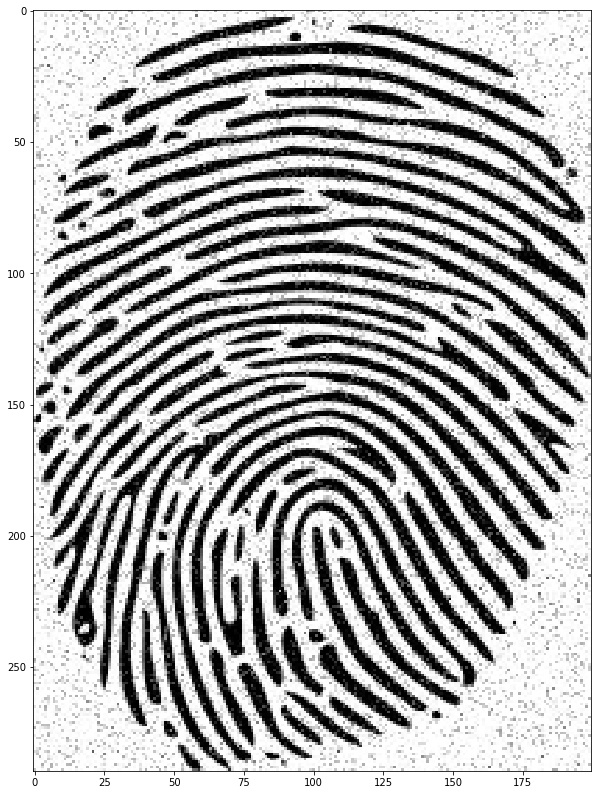

In [ ]:
arr_pic1 = im_load(ruta+nombre1)
im_show(arr_pic1,"nearest")

<class 'numpy.ndarray'>


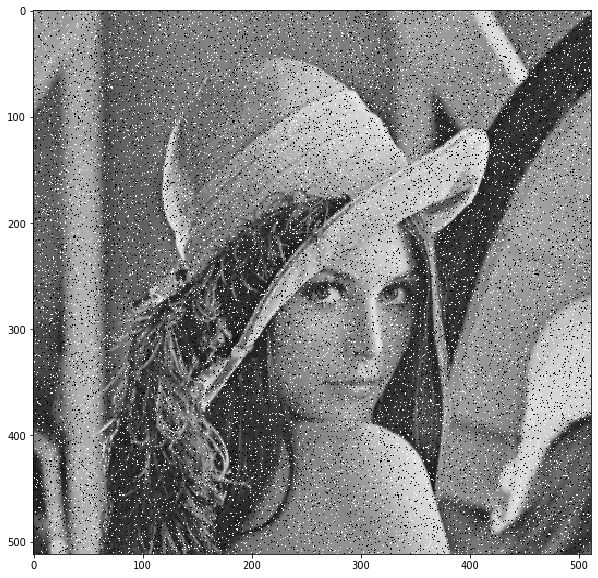

In [ ]:
img_noise = noise(arr_pic1,0.05,0.05)
im_show(img_noise,"nearest")

# **Filtro Gaussiano**

Simulan una distribución gaussiana bivariante. El valor máximo aparece en el pixel central y disminuye hacia los extremos tanto más rápido cuanto menor sea el parámetro dedesviación típicas. El resultado será un conjunto de valores entre 0 y 1. Para transformar la matriz a una matriz de números enteros se divide toda la matriz por el menor de los valores obtenidos. La ecuación para calcularla es:

\begin{equation}
g(x,y) = e^{\frac{-x^2+y^2}{2*S^2}}
\end{equation}

\begin{equation}
G(x,y) = \frac{g(x,y)}{min_{x,y}(g(x,y))}
\end{equation}

<class 'numpy.ndarray'>


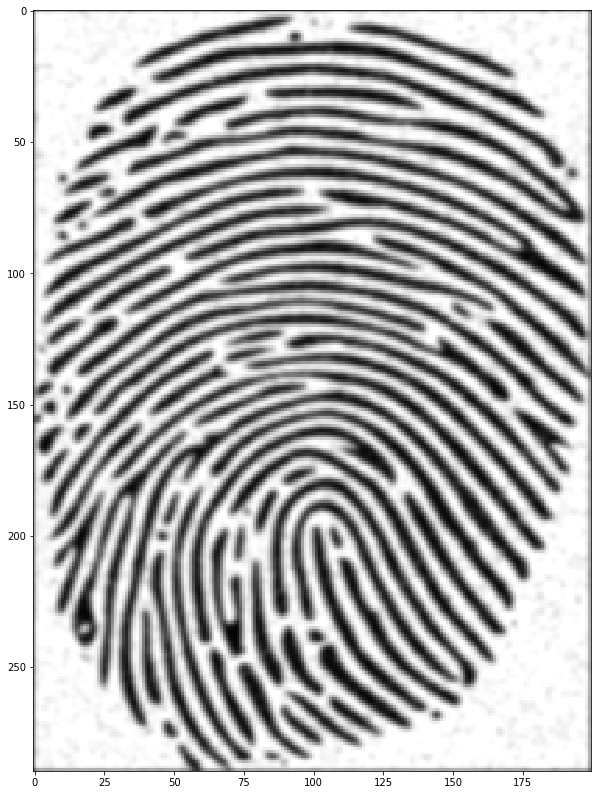

In [ ]:
gauss = gaussiano(arr_pic1) 
im_show(gauss,"nearest")

# **Filtro Promediador**

Dada una imagen $f(x, y)$ de tamaño $NxN$, el valor del nivel de gris de la imagen suavizada $g(x, y)$ en el punto $(x, y)$ se obtiene promediando los valores de nivel de gris de los puntos de $f$ contenidos en una cierta vecindad de $(x, y)$.

\begin{equation}
g(x,y) = \frac{1}{N}\sum_{(m,n)\epsilon S}f(n,m)
\end{equation}

donde $x,y = 0,1, . . . , N−1$. $S$ es el conjunto de coordenadas de los puntos vecinos a $(x, y)$, incluyendo el propio $(x, y)$, y $M$ es el número de puntos de la vecindad.

Esta operación se puede realizar de forma general centrando la máscara en $(x, y)$ y multiplicando cada punto debajo de la máscara por el correspondiente coeficientede la máscara y sumando el resultado.


<class 'numpy.ndarray'>


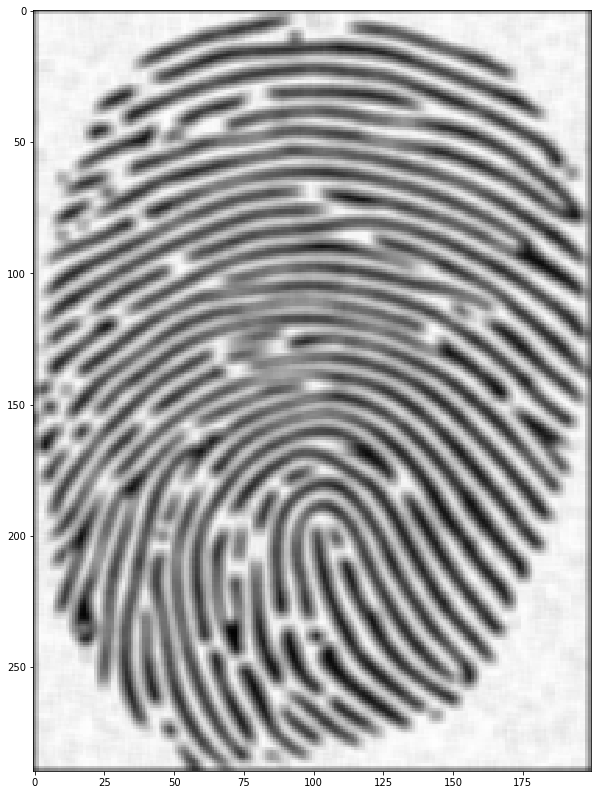

In [ ]:
prom = promedio(arr_pic1)
im_show(prom,"nearest")

<class 'numpy.ndarray'>


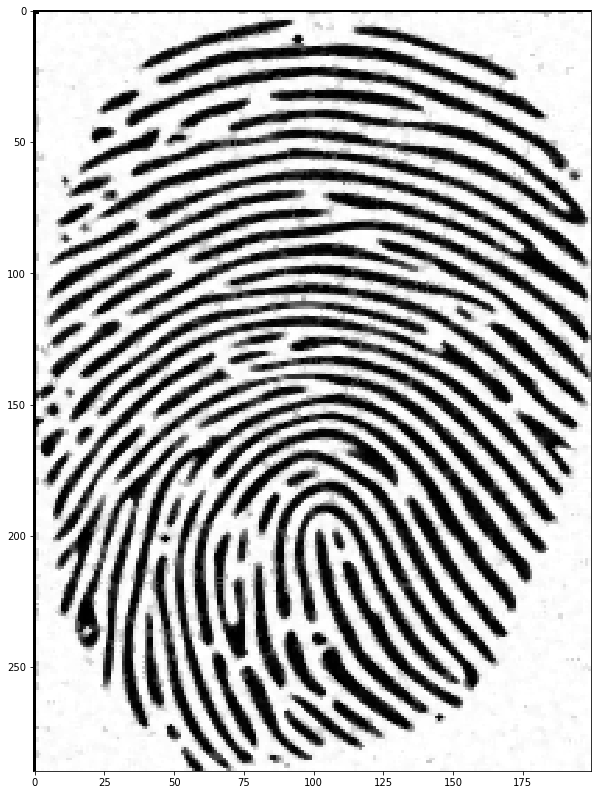

In [ ]:
med = mediana(arr_pic1)
im_show(med,"nearest")

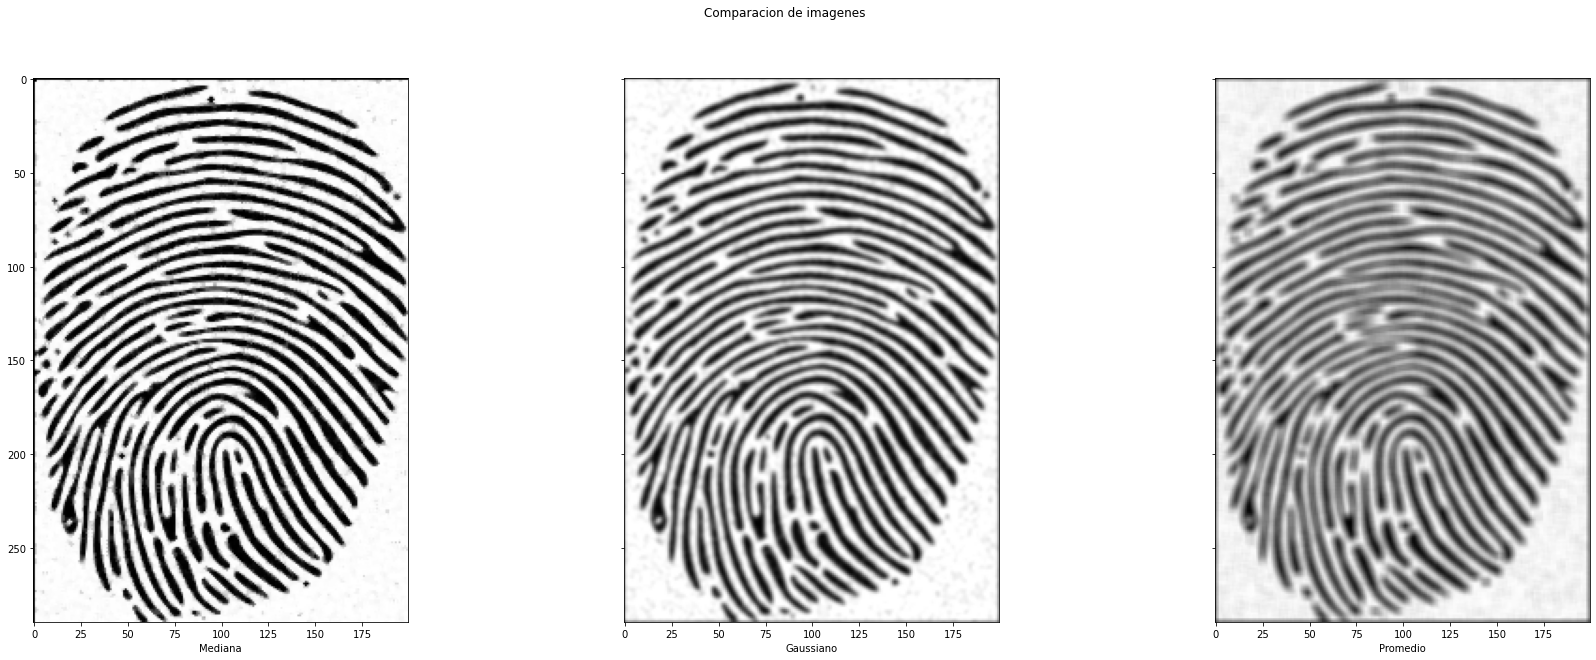

In [ ]:
mostrar_comparacion(med, gauss, prom)

Image type:<class 'PIL.JpegImagePlugin.JpegImageFile'>
Dimentions(512, 512)
Channels:1
<class 'numpy.ndarray'>


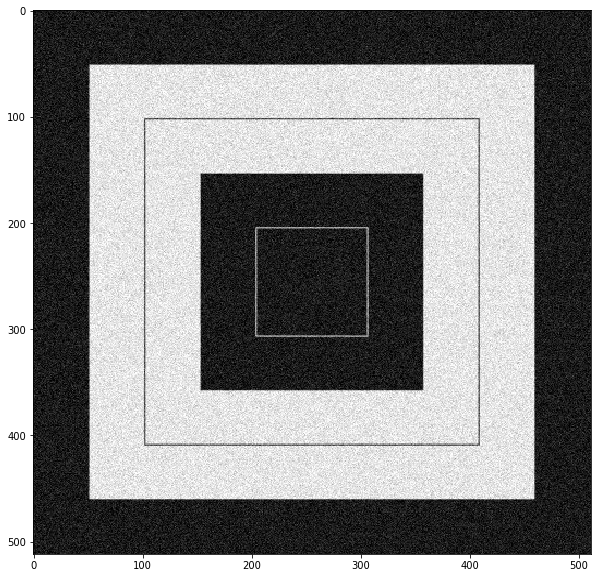

In [ ]:
arr_pic2 = im_load(ruta+nombre2)
im_show(arr_pic2,"nearest")

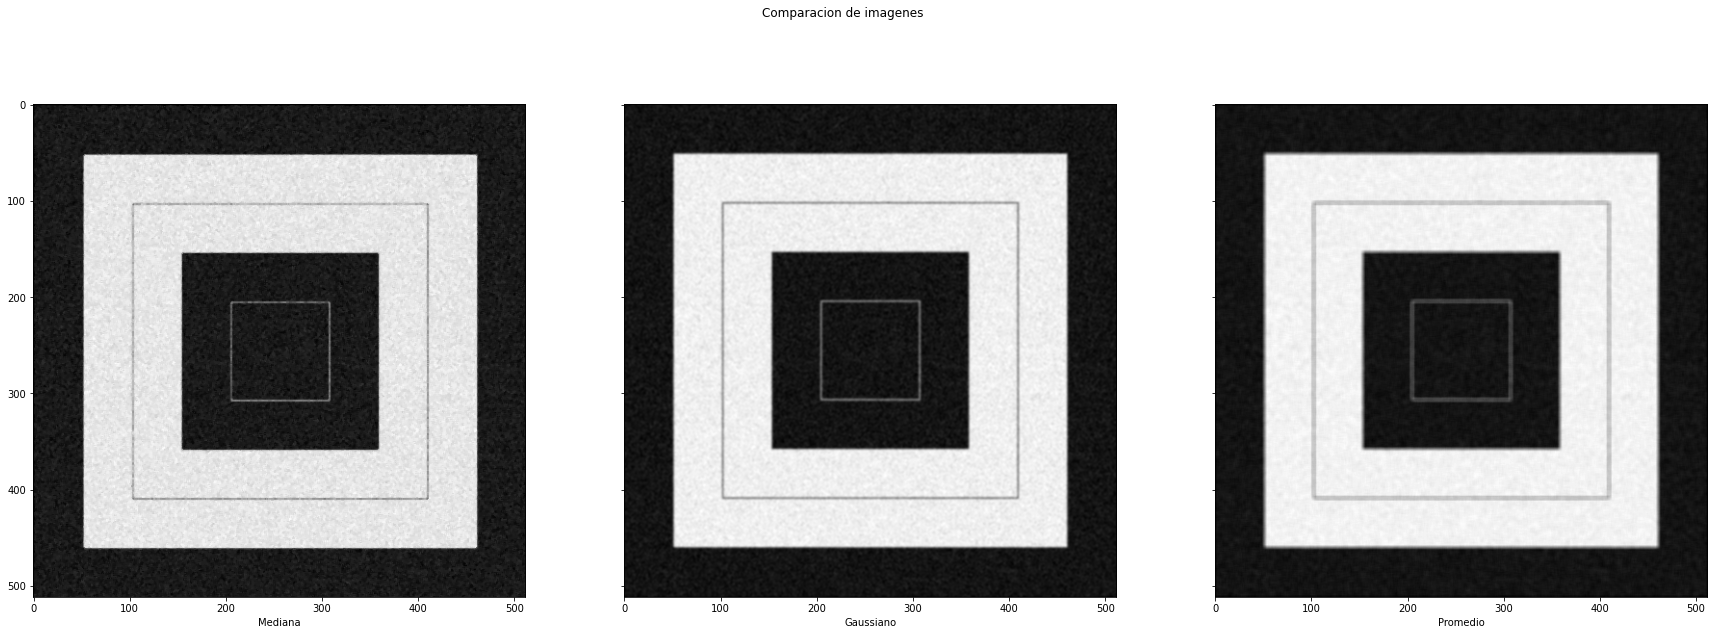

In [ ]:
gauss2 = gaussiano(arr_pic2)
prom2 = promedio(arr_pic2)
med2 = mediana(arr_pic2)
mostrar_comparacion(med2, gauss2, prom2)

Image type:<class 'PIL.PngImagePlugin.PngImageFile'>
Dimentions(428, 320)
Channels:1
<class 'numpy.ndarray'>


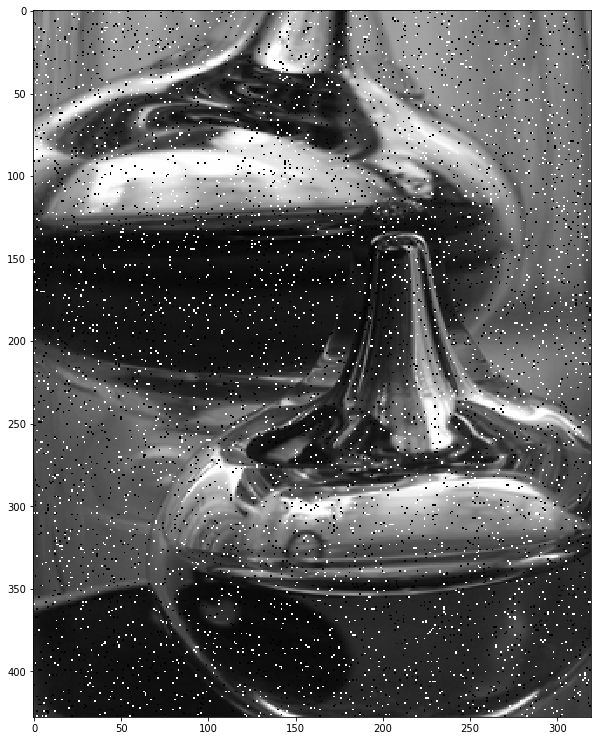

In [ ]:
arr_pic3 = im_load(ruta+nombre3)
im_show(arr_pic3,"nearest")

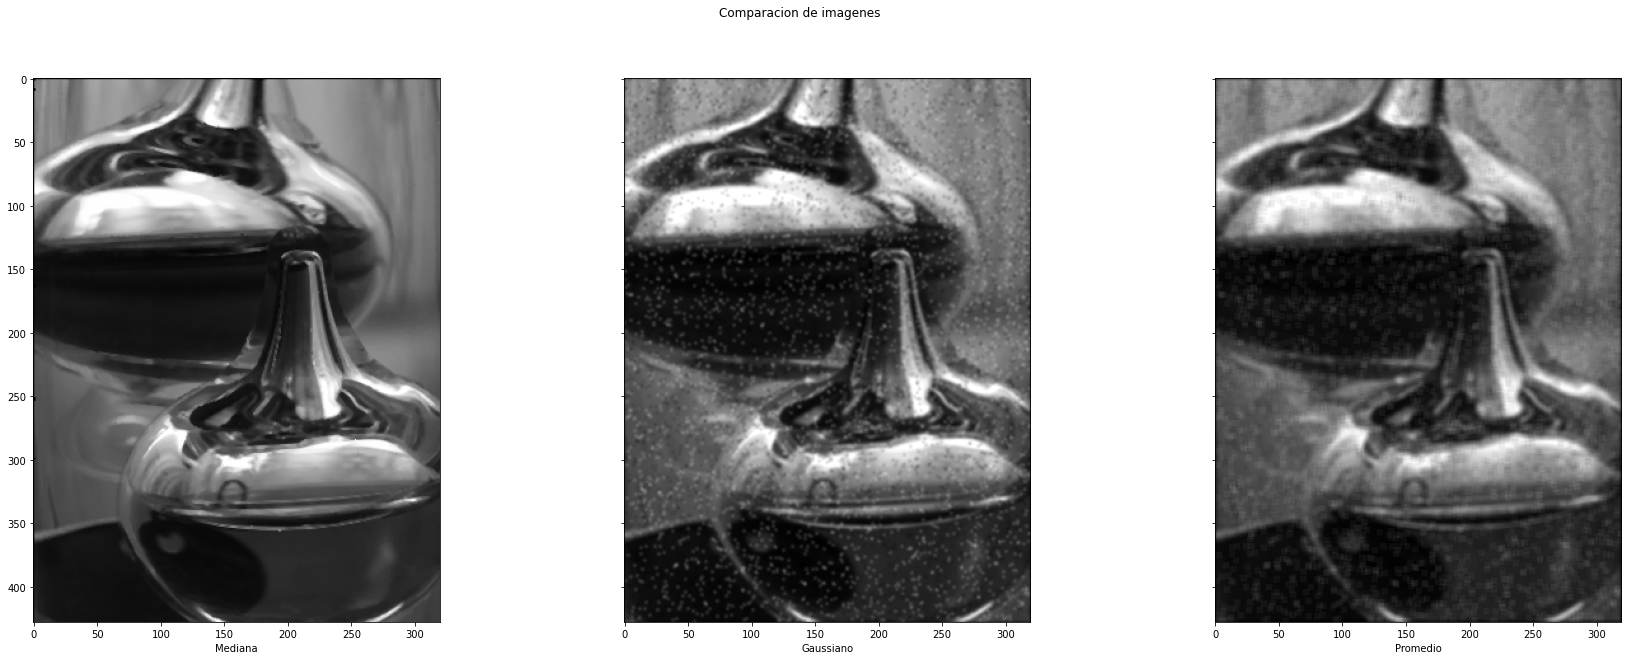

In [ ]:
gauss3 = gaussiano(arr_pic3)
prom3 = promedio(arr_pic3)
med3 = mediana(arr_pic3)
mostrar_comparacion(med3, gauss3, prom3)

Image type:<class 'PIL.JpegImagePlugin.JpegImageFile'>
Dimentions(384, 512, 3)
Channels:3
<class 'numpy.ndarray'>


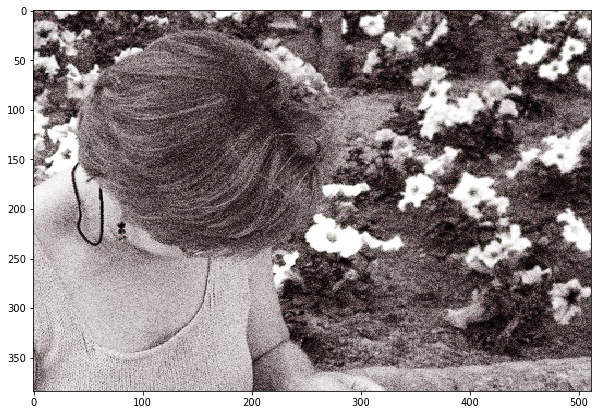

In [ ]:
arr_pic4 = im_load(ruta+nombre4)
im_show(arr_pic4,"nearest")

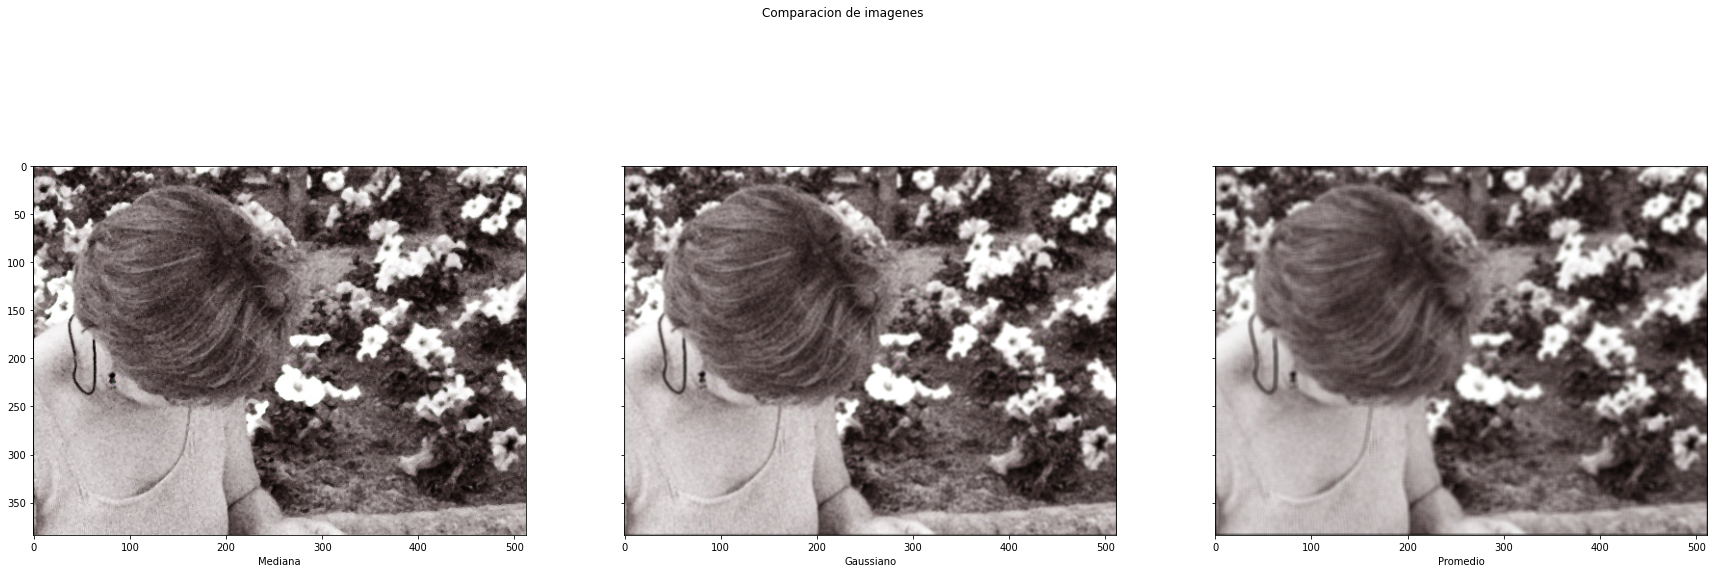

In [ ]:
gauss4 = gaussiano(arr_pic4)
prom4 = promedio(arr_pic4)
med4 = mediana(arr_pic4)
mostrar_comparacion(med4, gauss4, prom4)